# Lab 7 -  Model comparison
F - number of letters in first name
L - number of letters in last name
N = (L+F)*100




In [3]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
F = 5
L = 4
N = (F+L)*100

## Excercise 1 - generate data

1. Compile code_1.stan and  code_2.stan 
2. Generate data for rest of excercises.



In [6]:
code1 = CmdStanModel(stan_file='code_1.stan')
code2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab7/code_1.stan to exe file /home/szut/DA/lab7/code_1
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab7/code_1
INFO:cmdstanpy:compiling stan file /home/szut/DA/lab7/code_2.stan to exe file /home/szut/DA/lab7/code_2
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab7/code_2


In [7]:
smp1 = code1.sample(data={'N':N})
y1 = smp1.stan_variable(var='y')
smp2 = code2.sample(data={'N':N})
y2 = smp2.stan_variable(var='y')

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)





chain 1 |██▋       | 00:00 Iteration: 400 / 1000 [ 40%]  (Sampling)

chain 1 |███▋      | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)

chain 1 |████▌     | 00:01 Iteration: 800 / 1000 [ 80%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                      
chain 2 |██████████| 00:01 Sampling completed

chain 3 |██████████| 00:01 Sampling completed


chain 4 |██████████| 00:01 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)





chain 1 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:01 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:02 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |████      | 00:02 Iteration: 700 / 1000 [ 70%]  (Sampling)



chain 1 |████▌     | 00:03 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:03 Iteration: 900 / 1000 [ 90%]  (Sampling)




chain 1 |██████████| 00:03 Sampling completed                      
chain 2 |██████████| 00:03 Sampling completed                      

chain 3 |██████████| 00:03 Sampling completed


chain 4 |██████████| 00:03 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Excercise 2 - compare normal and student models for data from first file

1. Compile both models
2. Fit both models
3. Using az.compare and az.plot_compare analyze both models using ```loo``` and ```waic``` criteria. 



In [8]:
code3 = CmdStanModel(stan_file='code_3.stan')
code4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab7/code_3.stan to exe file /home/szut/DA/lab7/code_3
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab7/code_3
INFO:cmdstanpy:compiling stan file /home/szut/DA/lab7/code_4.stan to exe file /home/szut/DA/lab7/code_4
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab7/code_4


In [9]:
fit3 = code3.sample(data={'N': N, 'y': y1[0]})
fit4 = code4.sample(data={'N': N, 'y': y2[0]})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)




chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


/home/szut/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

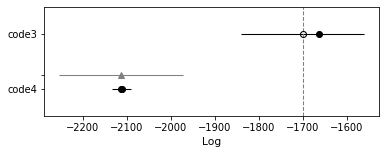

In [10]:
comp=az.compare({"code3" : fit3, "code4" : fit4}, ic='loo')
az.plot_compare(comp)

/home/szut/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<AxesSubplot:xlabel='Log'>

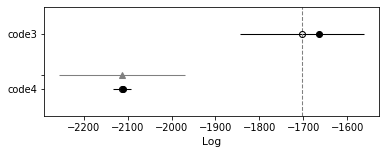

In [11]:
comp_waic=az.compare({"code3" : fit3, "code4" : fit4}, ic='waic')
az.plot_compare(comp_waic)

In [13]:
compare_both = az.compare({"code3" : fit3, "code4" : fit4})

print(compare_both)

/home/szut/anaconda3/lib/python3.8/site-packages/arviz/stats/stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


       rank          loo      p_loo      d_loo    weight          se  \
code3     0 -1700.805996  36.938487    0.00000  0.999511  139.022909   
code4     1 -2112.745227   1.998560  411.93923  0.000489   21.262041   

              dse  warning loo_scale  
code3    0.000000     True       log  
code4  141.109222    False       log  


### Excercise 3 - compare models with different numbers of predictors

1. Compile model
2. Compare models for 1, 2 and 3 predictors as in previous excercise

In [14]:
code5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/szut/DA/lab7/code_5.stan to exe file /home/szut/DA/lab7/code_5
INFO:cmdstanpy:compiled model executable: /home/szut/DA/lab7/code_5


In [16]:
y_hat=fit4.stan_variable('y_hat')

X1=y_hat[0:1].transpose() 
d1= {'N':N, 'K':1, 'y':y2[0] , 'X':X1 }
fit1=code5.sample(data=d1)

X2=y_hat[0:2].transpose()
d2 = {'N':N, 'K':2, 'y':y2[0] , 'X':X2 }
fit2=code5.sample(data=d2)

X3=y_hat[0:3].transpose()
d3 = {'N':N, 'K':3, 'y':y2[0] , 'X':X3 }
fit3=code5.sample(data=d3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)




chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)









chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)






chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:xlabel='Log'>

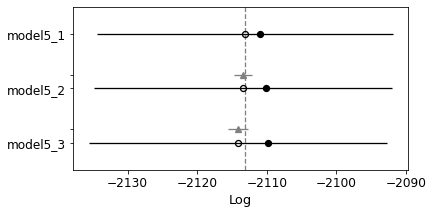

In [17]:
comp=az.compare({"model5_1" : fit1, "model5_2" : fit2, "model5_3": fit3}, ic='loo')
az.plot_compare(comp)

<AxesSubplot:xlabel='Log'>

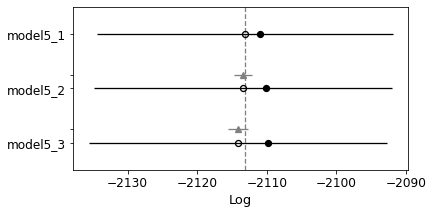

In [18]:
comp_waic=az.compare({"model5_1" : fit1, "model5_2" : fit2, "model5_3": fit3}, ic='waic')
az.plot_compare(comp_waic)